In [1]:
from __future__ import division, print_function
import sys 
sys.path.insert(0,'../rl_network'); import actorcritic as ac;  import stategen as sg
sys.path.insert(0,'../environments/'); import gridworld as eu
sys.path.insert(0,'../memory/'); import episodic as ec
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline 
fig_savedir = '../data/figures/'
print_freq = 1/10
import importlib

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.colorbar as colorbar
import matplotlib.cm as cmx
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
from matplotlib.path import Path

In [2]:
# environment parameters 
y_height = 20
x_width = 20

walls = False
rho = 0
maze_type = 'none'
port_shift = 'none'

#make environment
maze = eu.gridworld([y_height, x_width], 
                    rho = rho, 
                    maze_type = maze_type, 
                    port_shift = port_shift, 
                    walls = walls,
                    barheight=int(y_height/2 -1))
maze.rwd_loc = [(int(y_height/2),int(x_width/2))]
#maze.rwd_loc = [(5,15)]
if maze_type is not 'triple_reward':
    for i in maze.rwd_loc: 
        maze.orig_rwd_loc.append(i)


## test out gridworld wrapper. 
env = eu.gymworld(maze)
counter = 0 

path_length = 40

def make_visited_locs(reward, start_loc): 
    reward_y, reward_x = reward[0], reward[1]
    start_y, start_x = start_loc[0], start_loc[1]
    cur_loc = start_loc
    visited_states = [cur_loc]
    
    for i in range(path_length):
        if cur_loc == reward:
            break
        elif abs(reward_y-start_y) > 0 or abs(reward_x-start_x) > 0: 
            if abs(reward_y-cur_loc[0]) == 0: 
                move_x = 1
                move_y = 0
            elif abs(reward_x-cur_loc[1]) == 0:
                move_x = 0
                move_y = 1
            else: 
                move_x = np.random.choice([0,1])
                move_y = abs(1-move_x)
            
            next_loc = (int(cur_loc[0] + move_y*((reward_y-start_y)/abs(reward_y-start_y))), 
                        int(cur_loc[1] + move_x*((reward_x-start_x)/abs(reward_x-start_x))))
            visited_states.append(next_loc)
            cur_loc = next_loc
            
    return visited_states
        
maze.cur_state = (np.random.choice(np.arange(x_width)), np.random.choice(np.arange(y_height)))       
visited_locs = make_visited_locs(maze.rwd_loc[0], maze.cur_state)


<Figure size 432x288 with 0 Axes>

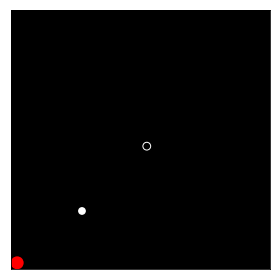

<Figure size 432x288 with 0 Axes>

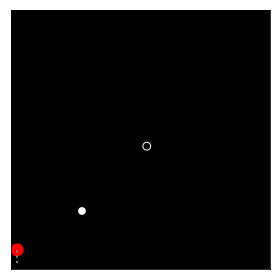

<Figure size 432x288 with 0 Axes>

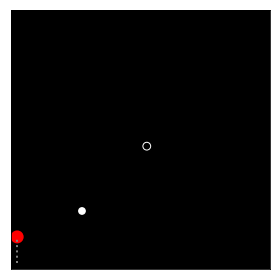

<Figure size 432x288 with 0 Axes>

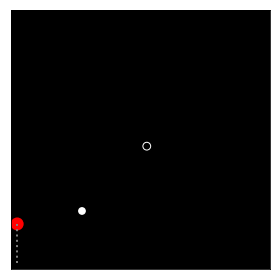

<Figure size 432x288 with 0 Axes>

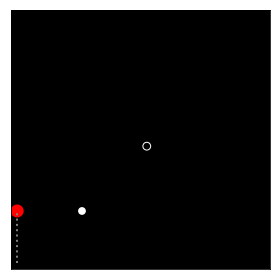

<Figure size 432x288 with 0 Axes>

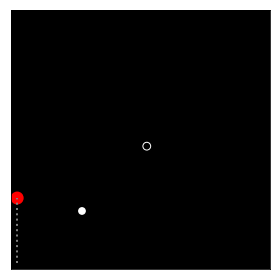

<Figure size 432x288 with 0 Axes>

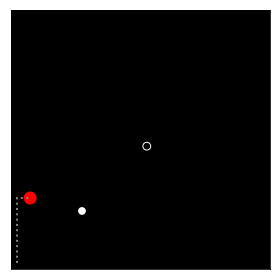

<Figure size 432x288 with 0 Axes>

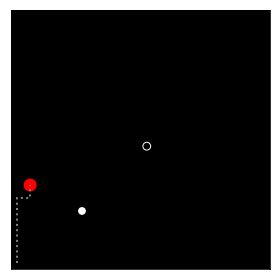

<Figure size 432x288 with 0 Axes>

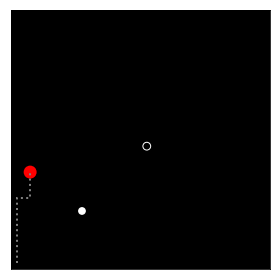

<Figure size 432x288 with 0 Axes>

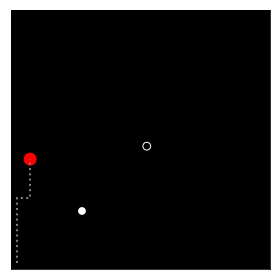

<Figure size 432x288 with 0 Axes>

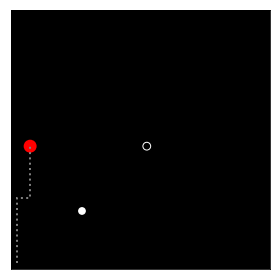

<Figure size 432x288 with 0 Axes>

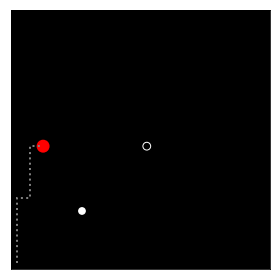

<Figure size 432x288 with 0 Axes>

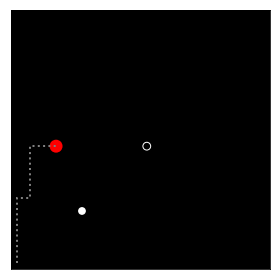

<Figure size 432x288 with 0 Axes>

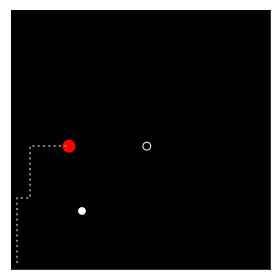

<Figure size 432x288 with 0 Axes>

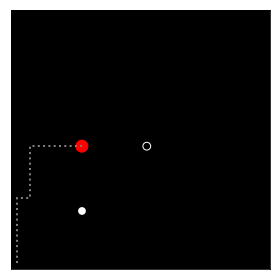

<Figure size 432x288 with 0 Axes>

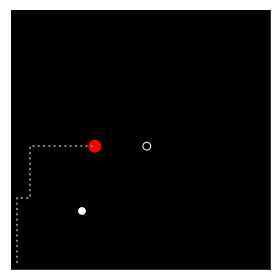

<Figure size 432x288 with 0 Axes>

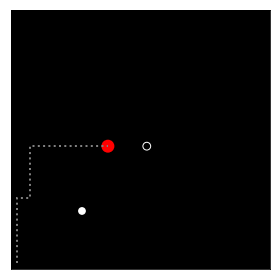

<Figure size 432x288 with 0 Axes>

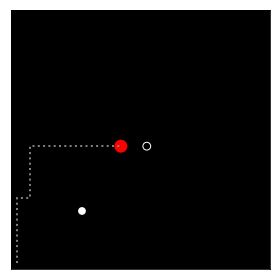

<Figure size 432x288 with 0 Axes>

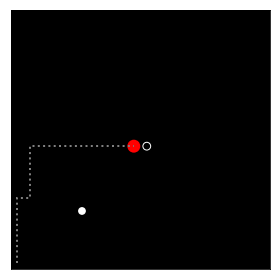

<Figure size 432x288 with 0 Axes>

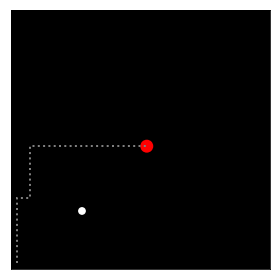

In [4]:
num_runs = 1

for j in range(num_runs):
    maze.cur_state = (np.random.choice(np.arange(20)), np.random.choice(np.arange(20)))       
    if j == 0:
        maze.cur_state = (0,19)
    visited_locs = make_visited_locs(maze.rwd_loc[0], maze.cur_state)
    counter = 0 
    states = [] 

    for current_spot in visited_locs:
        maze.cur_state = current_spot
        states.append(np.asarray(np.add(maze.cur_state, (0.5,0.5)) ))

        grid = maze.grid
        useable_grid = maze.useable
        agent_loc = maze.cur_state

        # plot maze -- agent (blue) and reward (red)
        plt.figure('clear')
        fig = plt.figure()

        axis  = fig.add_axes([0.05, 0.05, .9, .9]) # [left, bottom, width, height]
        axis.pcolor(grid, cmap = 'bone', vmax =1, vmin = 0)

        ax = fig.gca()

        for rwd_loc in maze.rwd_loc:
            rwd_v, rwd_h = rwd_loc
            ax.add_patch(plt.Circle((5+.5, 15+.5), 0.3, fc='w'))
            ax.add_patch(plt.Circle((10+.5, 10+.5), 0.3, ec='w', fc = 'k'))

        agent_v, agent_h = agent_loc
        ax.add_patch(plt.Circle((agent_v+.5, agent_h+.5), 0.5, fc='r'))

        codes = [Path.MOVETO]
        for i in range(len(states)-1):
            codes.append(Path.LINETO)

        path = Path(states, codes)
        patch = patches.PathPatch(path, edgecolor='gray', facecolor='none', linestyle=':', lw=2)
        ax.add_patch(patch)


        ax.invert_yaxis()
        ax.set_aspect('equal')
        ax.set_xticks([])
        ax.set_yticks([])

        plt.savefig('./gif/figs/{}_{}.png'.format(j, counter), format='png', pad_inches =2)
        plt.show()
        counter += 1
        plt.close()


In [15]:
__author__ = 'Annik'
savedir = './gif/'
from images2gif import writeGif
from PIL import Image
import os
import moviepy.editor as mpy

fps = 2

n_lengths = []
for i in range(5):
    names = sorted((fn for fn in os.listdir('./gif/figs/') if (fn.endswith('.png') and fn[0]==str(i))))
    n_lengths.append(len(names))
    file_names = []
    for j in range(len(names)):
        file_names.append('./gif/figs/{}_{}.png'.format(i,j))
    print(file_names)
    filename = "{}".format(i)

    
    clip = mpy.ImageSequenceClip(file_names, fps=fps)
    clip.write_gif(savedir+'{}.gif'.format(filename), fps=fps)
#images = [Image.open(savedir+fn) for fn in file_names]



['./gif/figs/0_0.png', './gif/figs/0_1.png', './gif/figs/0_2.png', './gif/figs/0_3.png', './gif/figs/0_4.png', './gif/figs/0_5.png', './gif/figs/0_6.png', './gif/figs/0_7.png', './gif/figs/0_8.png', './gif/figs/0_9.png', './gif/figs/0_10.png', './gif/figs/0_11.png', './gif/figs/0_12.png']

[MoviePy] Building file ./gif/0.gif with imageio


 93%|█████████▎| 13/14 [00:00<00:00, 40.79it/s]

['./gif/figs/1_0.png', './gif/figs/1_1.png', './gif/figs/1_2.png', './gif/figs/1_3.png', './gif/figs/1_4.png', './gif/figs/1_5.png', './gif/figs/1_6.png', './gif/figs/1_7.png', './gif/figs/1_8.png']

[MoviePy] Building file ./gif/1.gif with imageio



 90%|█████████ | 9/10 [00:00<00:00, 42.63it/s]

['./gif/figs/2_0.png', './gif/figs/2_1.png', './gif/figs/2_2.png', './gif/figs/2_3.png', './gif/figs/2_4.png', './gif/figs/2_5.png', './gif/figs/2_6.png', './gif/figs/2_7.png', './gif/figs/2_8.png', './gif/figs/2_9.png', './gif/figs/2_10.png', './gif/figs/2_11.png', './gif/figs/2_12.png', './gif/figs/2_13.png', './gif/figs/2_14.png', './gif/figs/2_15.png']

[MoviePy] Building file ./gif/2.gif with imageio



 94%|█████████▍| 16/17 [00:00<00:00, 38.04it/s]

['./gif/figs/3_0.png', './gif/figs/3_1.png', './gif/figs/3_2.png', './gif/figs/3_3.png', './gif/figs/3_4.png', './gif/figs/3_5.png', './gif/figs/3_6.png', './gif/figs/3_7.png', './gif/figs/3_8.png', './gif/figs/3_9.png', './gif/figs/3_10.png', './gif/figs/3_11.png']

[MoviePy] Building file ./gif/3.gif with imageio



 92%|█████████▏| 12/13 [00:00<00:00, 36.56it/s]


['./gif/figs/4_0.png', './gif/figs/4_1.png', './gif/figs/4_2.png', './gif/figs/4_3.png', './gif/figs/4_4.png', './gif/figs/4_5.png', './gif/figs/4_6.png', './gif/figs/4_7.png', './gif/figs/4_8.png', './gif/figs/4_9.png', './gif/figs/4_10.png', './gif/figs/4_11.png', './gif/figs/4_12.png', './gif/figs/4_13.png', './gif/figs/4_14.png', './gif/figs/4_15.png', './gif/figs/4_16.png', './gif/figs/4_17.png', './gif/figs/4_18.png', './gif/figs/4_19.png']

[MoviePy] Building file ./gif/4.gif with imageio


 95%|█████████▌| 20/21 [00:00<00:00, 38.13it/s]


In [16]:
names = sorted((fn for fn in os.listdir('./gif/figs/') if (fn.endswith('.png') and fn[0]==str(i))))
file_names = []
for i in range(num_runs):
    for j in range(n_lengths[i]):
        file_names.append('./gif/figs/{}_{}.png'.format(i,j))
print(file_names)
filename = "{}".format(i)


clip = mpy.ImageSequenceClip(file_names, fps=fps)
clip.write_gif(savedir+'composite.gif'.format(filename), fps=fps)



['./gif/figs/0_0.png', './gif/figs/0_1.png', './gif/figs/0_2.png', './gif/figs/0_3.png', './gif/figs/0_4.png', './gif/figs/0_5.png', './gif/figs/0_6.png', './gif/figs/0_7.png', './gif/figs/0_8.png', './gif/figs/0_9.png', './gif/figs/0_10.png', './gif/figs/0_11.png', './gif/figs/0_12.png']

[MoviePy] Building file ./gif/composite.gif with imageio


 93%|█████████▎| 13/14 [00:00<00:00, 40.99it/s]
